In [63]:
# Directory structure:

# /sqlalchemy-challenge/Resources: Resources used by script, like Database etc.

# /sqlalchemy-challenge/SourceCode for Source code
#    # app.py: Script for Flask
#    # climate.ipynb: Script to read DB and produce output 

# /sqlalchemy-challenge/Output: Output maps/images produced by the script

# /sqlalchemy-challenge/Instructions: Instructions and materials provided as part of the exercise 

In [64]:
# Import Dependencies

%matplotlib notebook
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [65]:
# Import Dependencies

import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [66]:
# Import - Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [67]:
# SQL Engine 
# Connection syntax for sqlite://<nohostname>/<path> where <path> is relative: So in this case use .. to go one folder up

engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [68]:
# Reflect an existing database into a new model

Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [69]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [70]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [71]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

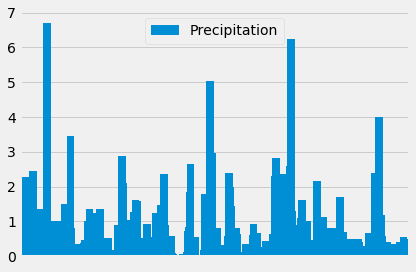

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
maxdate_str = session.query(func.max(Measurement.date)).first()[0]
# Convert to date (use dt.datetime.strptime().date())
maxdate = dt.datetime.strptime(maxdate_str, '%Y-%m-%d').date()
maxdate_1yearago = maxdate - dt.timedelta(days=365)
maxdate_1yearago_str = maxdate_1yearago.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
# Dropped where precipitation is NULL (can be done in Pandas Datframe also)
precip_scores = session.query(Measurement).filter(Measurement.date >= maxdate_1yearago_str).filter(Measurement.prcp.isnot(None)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_scores_df = pd.read_sql(session.query(Measurement).filter(Measurement.date >= maxdate_1yearago_str).filter(Measurement.prcp.isnot(None)).statement, session.bind)
precip_scores_df.drop(columns=['id', 'station', 'tobs'], inplace=True)
precip_scores_df.rename(columns={"date": "Date", "prcp": "Precipitation"}, inplace=True)
precip_scores_df.set_index('Date')

# Sort the datafrme by date
precip_scores_df.sort_values(by=['Date'], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
    
ax = precip_scores_df.plot.bar(x = 'Date', y='Precipitation', width = 40)
ax.axes.get_xaxis().set_visible(False)
plt.tight_layout()
plt.savefig("../Output/precipitation.png")
plt.show()

In [73]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_scores_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [82]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(Station.station).group_by(Station.station).count()
print(station_count)

9


In [87]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [91]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

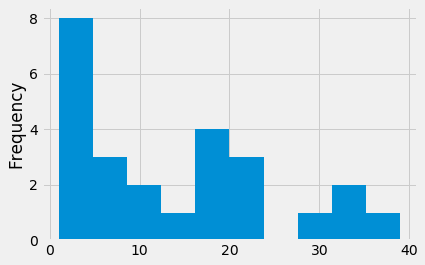

In [109]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


tobs_df = pd.read_sql(session.query(Measurement.tobs, func.count(Measurement.tobs)).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= maxdate_1yearago_str).group_by(Measurement.tobs).statement, session.bind)

ax = tobs_df["count_1"].plot.hist()
plt.savefig("../Output/temp.png")
plt.show()

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
